# Hypothesis: Students who spend more time online on social media are less likely to recommend the course.

### The following python cells read in the csv file and convert it into a column-oriented table.

In [97]:
%reload_ext autoreload
%autoreload 2

from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

First, I will create a dictionary with the columns "hours_online_social" and "would_recommend". Printed is the first 5 rows of that dictionary.

In [98]:
from data_utils import head, select

subset_new: dict[str, list[str]] = select(columns, ["hours_online_social", "would_recommend"])
head(subset_new,  5)

{'hours_online_social': ['3 to 5 hours',
  '5 to 10 hours',
  '3 to 5 hours',
  '5 to 10 hours',
  '3 to 5 hours'],
 'would_recommend': ['7', '7', '7', '7', '7']}

Next, I will make two lists that contain the rating scores of all students who reported spending either 5 to 10 or 0 to 2 hours on social media.

In [99]:
from data_utils import lists
scores_hours_online_social_5 = lists(subset_new, "hours_online_social", '5 to 10 hours', "would_recommend")
scores_hours_online_social_0 = lists(subset_new, "hours_online_social", '0 to 2 hours', "would_recommend")

Next, I will make two dictionaries containing the corresponding counts of each list created in the previous cell.

In [100]:
from data_utils import count1
from tabulate import tabulate
count_5_to_10 = count1(scores_hours_online_social_5)
count_0_to_2 = count1(scores_hours_online_social_0)

The following cell reports the ratings for students who reported using social media 5 to 10 hours a day.

In [101]:
print('For students who reported using social media 5 to 10 hours a day:')

print(f"{count_5_to_10['1']} rated the class a 1")
print(f"{count_5_to_10['2']} rated the class a 2")
print(f"{count_5_to_10['3']} rated the class a 3")
print(f"{count_5_to_10['4']} rated the class a 4")
print(f"{count_5_to_10['5']} rated the class a 5")
print(f"{count_5_to_10['6']} rated the class a 6")
print(f"{count_5_to_10['7']} rated the class a 7")

For students who reported using social media 5 to 10 hours a day:
2 rated the class a 1
3 rated the class a 2
6 rated the class a 3
19 rated the class a 4
21 rated the class a 5
29 rated the class a 6
37 rated the class a 7


The following cell reports the ratings for students who reported using social media 0 to 2 hours a day.

In [102]:
print('For students who reported using social media 0 to 2 hours a day:')

print(f"{count_0_to_2['1']} rated the class a 1")
print(f"{count_0_to_2['2']} rated the class a 2")
print(f"{count_0_to_2['3']} rated the class a 3")
print(f"{count_0_to_2['4']} rated the class a 4")
print(f"{count_0_to_2['5']} rated the class a 5")
print(f"{count_0_to_2['6']} rated the class a 6")
print(f"{count_0_to_2['7']} rated the class a 7")

For students who reported using social media 0 to 2 hours a day:
3 rated the class a 1
5 rated the class a 2
10 rated the class a 3
21 rated the class a 4
24 rated the class a 5
25 rated the class a 6
41 rated the class a 7


The following bar plot reports my findings with the Y axis being the total number of students and the X axis being the class rating.

<BarContainer object of 7 artists>

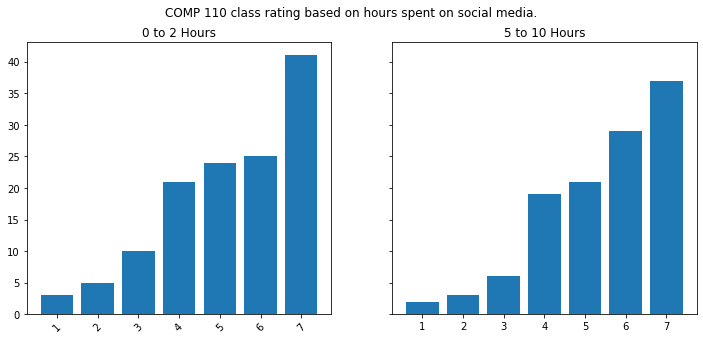

In [103]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("COMP 110 class rating based on hours spent on social media.")


axes[0].set_title("0 to 2 Hours")
axes[0].bar(count_0_to_2.keys(), count_0_to_2.values())
axes[0].tick_params(axis='x', labelrotation = 45)

axes[1].set_title("5 to 10 Hours")
axes[1].bar(count_5_to_10.keys(), count_5_to_10.values())

# My analysis does not find a measurable correlation between social media usage and class rating.

The total number of students reporting each rating remains consistent for each subset of students. 